# Diversified Portfolio using correlation matrix
It is well known that a well-diversified portfolio benefits from holding assets with low correlation across different groups, while assets within each group should ideally have high correlation.

This project focuses on constructing a portfolio based solely on the correlation matrix and analyzing its performance without considering other factors such as industry, market news, or external influences. Therefore, a high correlation between stocks in this project does not necessarily imply that these stocks are related in any specific way. This serves as a test with many limitations, all of which have been addressed throughout the project.



We will use the entire US stock market data: equity then use yfinance to retrieve historical data. To retrieve historical data, I will use yfinance for stock price information. While Adjusted Close price is more optimal but I could no longer fetch it, I will continue using Close price.

In [2]:
import pandas as pd
URL = r"C:\Users\User\Desktop\Symbol.csv"
df = pd.read_csv(URL) 
tickers = df.values.flatten().tolist()
tickers = [str(ticker).strip().upper() for ticker in tickers if pd.notna(ticker)]  

After fetching the historical stock data (in the past 2 years) using yfinance,I will export the data to an excel file, for better storage for future analysis. However, this is optional—if preferred, we can still directly use the fetched data for processing without exporting to an external file.

In [5]:
"""import yfinance as yf
price = yf.download(tickers, period="2y", interval="1d")
close = price["Close"]
close.dropna(axis=1)"""

[*******************   40%                       ]  3028 of 7622 completedFailed to get ticker 'BC/PA' reason: Expecting value: line 1 column 1 (char 0)
[**********************76%***********            ]  5800 of 7622 completedFailed to get ticker 'BC/PB' reason: Expecting value: line 1 column 1 (char 0)
[**********************85%****************       ]  6488 of 7622 completedFailed to get ticker 'BC/PC' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  7621 of 7622 completed

968 Failed downloads:
['GRBK-P-A', 'HGTY-WS', 'FLG-P-A', 'BLEUR', 'WFC-P-Y', 'TEWS', 'SGBXV', 'SOLV-W', 'AMTM-W', 'GS-P-A', 'PCG-P-G', 'HPP-P-C', 'MFA-P-B', 'SES-WS', 'TRTN-P-A', 'GIW', 'APGB-U', 'GRCL', 'GETR-WS', 'PW-P-A', 'WBX-WS', 'GEHCV', 'FHN-P-B', 'CFG-P-E', 'DFFN', 'BHIL-WS', 'MRDB-WS', 'LCAA', 'DBRG-P-H', 'USB-P-P', 'BBAI-WS', 'THACU', 'VAL-WS', 'AGTC', 'DSKE', 'BAC-P-O', 'GBRG', 'SLG-P-I', 'TLGYW', 'GLOP-P-B', 'NTBL', 'CMRE-P-D', 'CVIIU', 'GGN-P-B', '

Ticker,AA,AACG,AAL,AAME,AAMI,AAOI,AAON,AAP,AAPL,AAT,...,ZTO,ZTS,ZUMZ,ZURA,ZVIA,ZVRA,ZVSA,ZWS,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-22,39.071533,1.87,13.82,2.362317,22.560663,2.370000,60.414928,108.660042,156.254227,15.112303,...,26.639097,158.246552,17.920000,30.000000,3.06,5.410,570.500,19.855179,8.38,10.77
2023-03-23,39.237339,1.76,13.63,2.440734,22.510841,2.460000,61.042870,106.307022,157.343231,14.624234,...,26.893522,158.109283,17.490000,33.209999,3.30,5.405,658.000,19.385000,8.19,10.67
2023-03-24,39.091042,1.88,13.72,2.440734,22.510841,2.410000,60.315773,106.010498,158.650040,15.165544,...,26.865253,160.992172,17.620001,29.420000,3.47,5.470,763.000,19.443773,8.20,10.99
2023-03-27,39.130054,1.82,13.94,2.430932,22.750000,1.720000,61.346931,109.750458,156.699707,15.325275,...,26.526020,162.492462,17.209999,16.840000,3.54,5.440,759.500,19.943335,8.10,11.38
2023-03-28,39.529934,1.81,13.98,2.450536,22.769928,1.820000,62.781284,110.706985,156.076004,15.564873,...,27.129099,161.835464,17.389999,16.280001,3.59,5.410,703.500,19.962921,8.07,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-17,34.790001,0.85,11.32,1.460000,25.080000,20.980000,82.660004,37.840000,214.000000,20.370001,...,20.730000,165.169998,14.610000,1.360000,2.25,8.350,0.790,33.480000,12.58,2.90
2025-03-18,33.970001,0.88,11.07,1.420000,25.350000,20.200001,79.800003,37.720001,212.690002,20.250000,...,21.299999,164.429993,14.320000,1.330000,2.03,7.970,0.743,33.400002,12.34,2.65
2025-03-19,35.310001,0.90,11.48,1.400000,25.980000,21.129999,81.480003,36.919998,215.240005,20.709999,...,21.760000,163.750000,14.970000,1.420000,2.10,7.950,0.760,34.009998,12.79,2.71


In [117]:
excel = pd.read_excel(r"C:\Users\User\Out_5.xlsx")
excel = excel.iloc[: , 1:]

I then compute daily returns for the stock in order to compute a correlation matrix. For faster observation, I'll use the sort value to show top 50 pairs with highest correlation, as long as the correlation > = 0.9. Notice that several tickers are from the same corporation, for example FOX - FOXA, : we should filter the ticker before processing to the next step.

In [125]:
returns = excel.pct_change(fill_method=None)
correlation_matrix = returns.corr()
sorted = correlation_matrix.unstack().sort_values().drop_duplicates()
sorted = sorted.sort_values(ascending=False, kind="quicksort")
sorted= sorted[sorted < 0.995]
filter_table = sorted[:50] #optional
filter_table

FLGC    NXTT      0.993925
CUK     CCL       0.993458
CNVS    NXTT      0.993408
        FLGC      0.991333
LGF-A   LGF-B     0.991323
LBTYA   LBTYK     0.988616
CWEN-A  CWEN      0.986178
FOX     FOXA      0.985148
UAA     UA        0.985009
CENT    CENTA     0.979280
BF-A    BF-B      0.974776
NWSA    NWS       0.974723
ATER    MBRX      0.973034
HEI     HEI-A     0.971584
NXTT    AHI       0.969021
LEN     LEN-B     0.968947
LICN    CLEU      0.967973
FWONA   FWONK     0.967085
IDAI    CMCT      0.966684
CNVS    AHI       0.966050
PBR-A   PBR       0.964483
AHI     FLGC      0.963226
BRK-A   BRK-B     0.961873
PAGP    PAA       0.958394
TDS     USM       0.949537
BN      BNT       0.948422
STBX    LICN      0.944621
SLXN    DBVT      0.941500
UZF     UZE       0.938513
CTDD    CTBB      0.935297
BULZ    FNGS      0.923869
STBX    CLEU      0.922749
AEM     GDXU      0.921803
AVB     EQR       0.917585
OMH     ABTS      0.913580
BEPC    BEP       0.912452
BATRK   BATRA     0.912445
U

then group tickers that show a high correlation into clusters. I will use nx.find_cliques(G) returns all maximal cliques, making sure that groups like A-B-C only exist if A is connected to C (forming a triangle/clique). In simple terms, if A-B and B-C are highly correlated, in order to form a group A-B-C, A-C must also have to be highly correlated.

In [126]:
import networkx as nx
G = nx.Graph()
for (ticker1, ticker2), correlation in filter_table.items():
    G.add_edge(ticker1, ticker2, weight=correlation)
groups = list(nx.find_cliques(G))
groups

[['CTBB', 'CTDD'],
 ['BEP', 'BEPC'],
 ['HEI', 'HEI-A'],
 ['BRK-B', 'BRK-A'],
 ['BMA', 'GGAL'],
 ['UAA', 'UA'],
 ['LGF-A', 'LGF-B'],
 ['QVCC', 'QVCD'],
 ['LRCX', 'KLAC', 'AMAT'],
 ['OMH', 'ABTS'],
 ['CENTA', 'CENT'],
 ['CWEN', 'CWEN-A'],
 ['CUK', 'CCL'],
 ['CLEU', 'STBX', 'LICN'],
 ['USM', 'TDS'],
 ['LBTYK', 'LBTYA'],
 ['CNVS', 'AHI', 'FLGC', 'NXTT'],
 ['BF-A', 'BF-B'],
 ['BULZ', 'FNGS'],
 ['NLY', 'AGNC'],
 ['FOXA', 'FOX'],
 ['PAGP', 'PAA'],
 ['PBR-A', 'PBR'],
 ['IDAI', 'CMCT'],
 ['GDXU', 'AEM'],
 ['BATRA', 'BATRK'],
 ['LEN-B', 'LEN'],
 ['ATER', 'MBRX'],
 ['UHAL', 'UHAL-B'],
 ['ABCB', 'UCB'],
 ['NWSA', 'NWS'],
 ['CUZ', 'HIW'],
 ['UZF', 'UZE'],
 ['RIO', 'BHP'],
 ['AVB', 'EQR'],
 ['DHI', 'LEN'],
 ['FWONK', 'FWONA'],
 ['SLXN', 'DBVT'],
 ['BNT', 'BN'],
 ['RILYN', 'RILYG'],
 ['LEN', 'PHM']]

Naming the groups with numbers for easier tracking

In [127]:
for name, group in enumerate(groups, 1):  # Start numbering from 1
    print(f"{name}: {group}")

1: ['CTBB', 'CTDD']
2: ['BEP', 'BEPC']
3: ['HEI', 'HEI-A']
4: ['BRK-B', 'BRK-A']
5: ['BMA', 'GGAL']
6: ['UAA', 'UA']
7: ['LGF-A', 'LGF-B']
8: ['QVCC', 'QVCD']
9: ['LRCX', 'KLAC', 'AMAT']
10: ['OMH', 'ABTS']
11: ['CENTA', 'CENT']
12: ['CWEN', 'CWEN-A']
13: ['CUK', 'CCL']
14: ['CLEU', 'STBX', 'LICN']
15: ['USM', 'TDS']
16: ['LBTYK', 'LBTYA']
17: ['CNVS', 'AHI', 'FLGC', 'NXTT']
18: ['BF-A', 'BF-B']
19: ['BULZ', 'FNGS']
20: ['NLY', 'AGNC']
21: ['FOXA', 'FOX']
22: ['PAGP', 'PAA']
23: ['PBR-A', 'PBR']
24: ['IDAI', 'CMCT']
25: ['GDXU', 'AEM']
26: ['BATRA', 'BATRK']
27: ['LEN-B', 'LEN']
28: ['ATER', 'MBRX']
29: ['UHAL', 'UHAL-B']
30: ['ABCB', 'UCB']
31: ['NWSA', 'NWS']
32: ['CUZ', 'HIW']
33: ['UZF', 'UZE']
34: ['RIO', 'BHP']
35: ['AVB', 'EQR']
36: ['DHI', 'LEN']
37: ['FWONK', 'FWONA']
38: ['SLXN', 'DBVT']
39: ['BNT', 'BN']
40: ['RILYN', 'RILYG']
41: ['LEN', 'PHM']


After forming different groups, check the correlation BETWEEN groups.

In [128]:
#correlation between group
group_returns = {}
for name, group in enumerate(groups, 1):
    close_group = excel[group]
    returns_group = close_group.pct_change(fill_method=None)
    group_avg_return = returns_group.mean(axis=1) 
    group_returns[name] = group_avg_return
    
group_returns_df = pd.DataFrame(group_returns)
corr_group_matrix = group_returns_df.corr()
corr_group_matrix

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
1,1.000000,0.152802,0.119723,0.111521,0.036559,0.008618,0.075970,0.144981,-0.020779,-0.000116,...,0.166909,0.218324,0.084052,0.109546,0.028268,0.125939,-0.049099,0.078458,-0.012240,0.035079
2,0.152802,1.000000,0.137584,0.155643,0.152297,0.244912,0.166583,0.177335,0.190818,0.065886,...,0.396154,0.169905,0.336523,0.344864,0.310179,0.113236,-0.017917,0.493978,-0.032163,0.323076
3,0.119723,0.137584,1.000000,0.352427,0.177047,0.087657,0.082847,0.083050,0.244558,-0.065244,...,0.253111,0.057609,0.169056,0.283888,0.211615,0.228846,0.009654,0.325898,0.110526,0.231745
4,0.111521,0.155643,0.352427,1.000000,0.162753,0.145506,0.150090,0.177650,0.079464,0.014275,...,0.330051,0.126495,0.188698,0.351491,0.220977,0.281968,-0.020443,0.401409,0.062879,0.241271
5,0.036559,0.152297,0.177047,0.162753,1.000000,0.160133,-0.011448,0.166531,0.251184,-0.074300,...,0.193872,0.139643,0.148629,0.109380,0.162392,0.185214,0.037211,0.296433,-0.041960,0.180608
6,0.008618,0.244912,0.087657,0.145506,0.160133,1.000000,0.157946,0.207546,0.196610,0.047708,...,0.306717,0.180267,0.318157,0.250330,0.255314,0.048007,0.004125,0.322955,0.057323,0.283135
7,0.075970,0.166583,0.082847,0.150090,-0.011448,0.157946,1.000000,0.079690,0.090080,-0.016543,...,0.323490,0.117401,0.261838,0.221129,0.173361,0.103783,-0.014022,0.302318,0.122103,0.191015
8,0.144981,0.177335,0.083050,0.177650,0.166531,0.207546,0.079690,1.000000,0.066411,-0.001000,...,0.224949,0.233693,0.166182,0.241248,0.188350,0.077671,-0.002139,0.284342,0.041205,0.202210
9,-0.020779,0.190818,0.244558,0.079464,0.251184,0.196610,0.090080,0.066411,1.000000,-0.083988,...,0.199717,0.102621,0.338040,0.070867,0.236590,0.231097,0.053387,0.401617,-0.036668,0.255458
10,-0.000116,0.065886,-0.065244,0.014275,-0.074300,0.047708,-0.016543,-0.001000,-0.083988,1.000000,...,-0.044801,0.020504,-0.007444,-0.036395,0.007699,-0.122909,0.002892,-0.078300,-0.033175,0.000177


Similar to the previous step, to speed up the process, I will sort the values from lowest to highest. I'll adjust the top number, as long as the correlation remains low

In [191]:
e = corr_group_matrix.unstack().sort_values().drop_duplicates()
e = e.sort_values(ascending=True, kind="quicksort")
e= e[e < 0.99999]
filter_group = e[:151]
filter_group

10  19   -0.135499
37  10   -0.122909
35  24   -0.113533
3   24   -0.107226
13  10   -0.099172
            ...   
9   28   -0.002614
17  40   -0.002499
    14   -0.002395
5   18   -0.002292
38  24   -0.002255
Length: 151, dtype: float64

Following the previous step, I will group assets that show low correlations into clusters (portfolios). Each cluster will represent a portfolio. However, I'm not sure whether asset groups that show negative correlations with each other will have a "cross-out" effect However, based on the previous correlation table, the lowest correlation is approximately -0.1, which is close to 0, ,meaning that the assets are largely independent of one another.

In [192]:
G = nx.Graph()
for (group1, group2), correlation in filter_group.items():
    G.add_edge(group1, group2, weight=correlation)
portfolios = list(nx.find_cliques(G))
for name_df, group_df in enumerate(portfolios, 1):  # Start numbering from 1
    print(f"{name_df}: {group_df}")

1: [1, 40, 9]
2: [1, 40, 38]
3: [1, 28, 9]
4: [34, 17, 10, 24]
5: [34, 17, 10, 28]
6: [35, 24, 10]
7: [35, 24, 38]
8: [35, 28, 10]
9: [14, 33, 17, 28]
10: [14, 2, 40, 38]
11: [14, 4, 24, 17]
12: [14, 4, 24, 38]
13: [14, 4, 28, 17]
14: [14, 36, 24, 38]
15: [14, 6, 17, 28]
16: [14, 38, 24, 32]
17: [14, 38, 24, 7]
18: [14, 38, 24, 40]
19: [14, 38, 24, 41]
20: [14, 38, 24, 11]
21: [14, 38, 24, 27]
22: [14, 38, 30]
23: [14, 38, 23, 40]
24: [14, 8, 17]
25: [14, 10, 5, 40]
26: [14, 10, 5, 7]
27: [14, 10, 37, 40]
28: [14, 10, 37, 28]
29: [14, 10, 9, 17, 40]
30: [14, 10, 9, 17, 28, 15]
31: [14, 10, 19, 40]
32: [14, 10, 21, 17, 28]
33: [14, 10, 23, 40]
34: [14, 10, 24, 32]
35: [14, 10, 24, 39]
36: [14, 10, 24, 13]
37: [14, 10, 24, 17, 3]
38: [14, 10, 24, 17, 7]
39: [14, 10, 24, 17, 40, 25]
40: [14, 10, 24, 17, 11]
41: [14, 10, 24, 17, 15]
42: [14, 10, 24, 17, 26]
43: [14, 10, 24, 20]
44: [14, 10, 24, 31]
45: [14, 10, 28, 32]
46: [14, 10, 28, 17, 7]
47: [14, 10, 28, 17, 11]
48: [14, 10, 28, 17, 2

<Axes: >

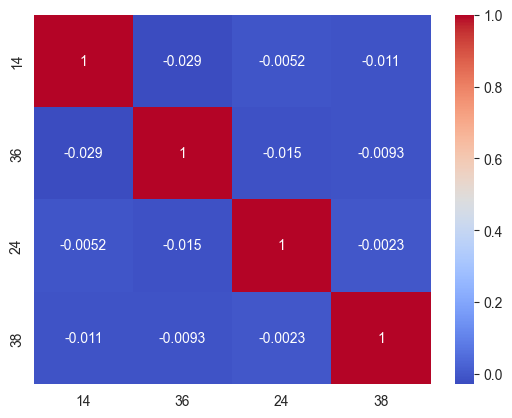

In [193]:
import seaborn as sns
chosen = [14, 36, 24, 38]
filtered_corr_matrix = corr_group_matrix.loc[chosen, chosen]
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')

In [194]:
for name, group in enumerate(groups, 1):  # Start numbering from 1
    if name in chosen: 
        print(f"{name}: {group}")

14: ['CLEU', 'STBX', 'LICN']
24: ['IDAI', 'CMCT']
36: ['DHI', 'LEN']
38: ['SLXN', 'DBVT']


I will randomly select this portfolio. Because Im using an equally weighted method, each group within the portfolio should have the same number of stocks. Therfore, I will drop one ticker from Group 14.

In [195]:
list_final = ['CLEU', 'STBX','IDAI', 'CMCT','DHI', 'LEN','SLXN', 'DBVT']
len(list_final)

8

TEST: From only a list of 7 stocks, let's compute the daily returns then compare it with the benchmark SP500. I should have used an ETF that tracks the entire US stock market for better observation. However, for simplicity, I will use the S&P 500 index, which is a widely recognized and commonly used benchmark for U.S. equities.

In [196]:
close_list = close[list_final ]
returns_list = close_list.pct_change()
list_avg_return = returns_list.mean(axis=1).dropna()

sp500_df = yf.download("^GSPC", period="2y", interval="1d")['Close']
sp500_returns = sp500_df.pct_change().dropna()
comparison = pd.concat([list_avg_return, sp500_returns], axis=1)

comparison.columns = ['portfolio_return', 'spx_index_return']
comparison


[*********************100%***********************]  1 of 1 completed


,portfolio_return,spx_index_return
Date,,
2023-03-23,0.017593,0.002985
2023-03-24,-0.012750,0.005640
2023-03-27,-0.020760,0.001647
2023-03-28,0.002515,-0.001574
2023-03-29,-0.001732,0.014237
...,...,...
2025-03-17,-0.056621,0.006416
2025-03-18,0.054578,-0.010654
2025-03-19,0.000115,0.010798


at the end of the period,I can see that the portfolio achieved better returns. This is because of the significant price increase of the pair "DHI" and "LEN", while other stocks in the portfolio go down

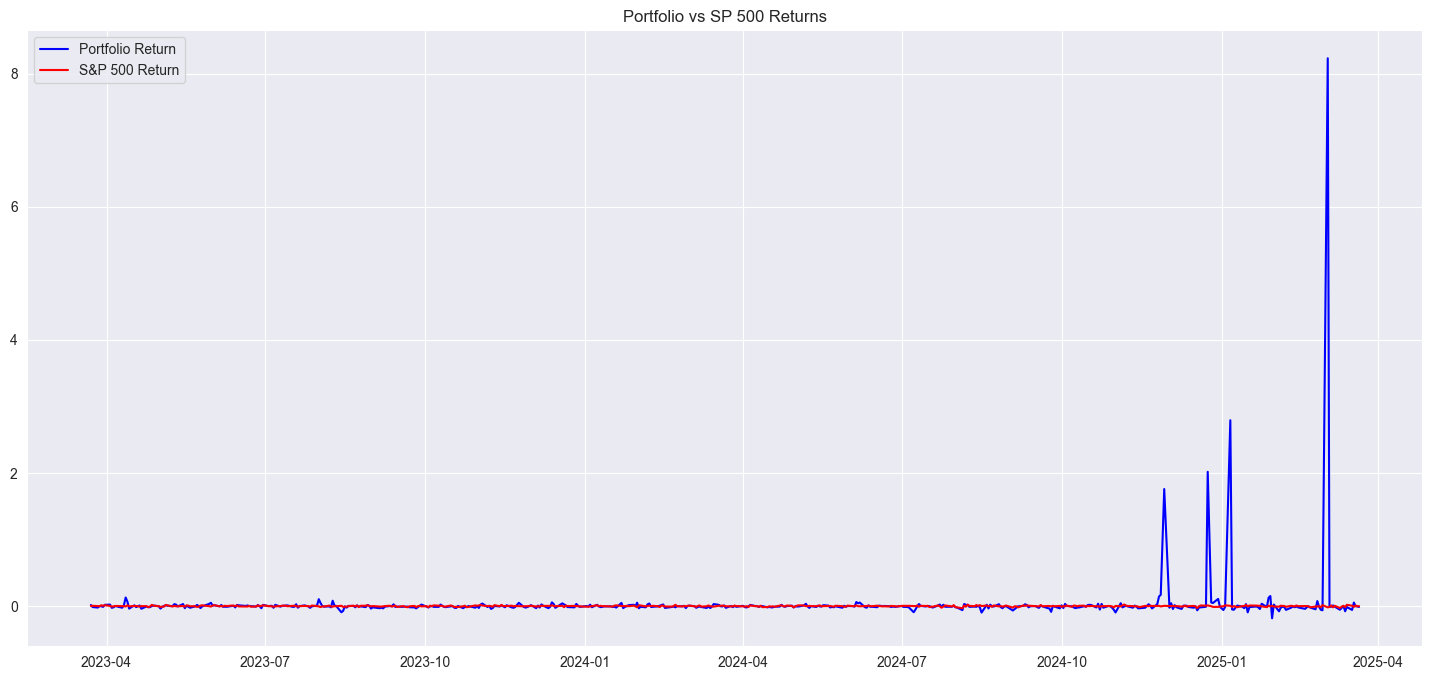

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,8))
plt.plot(comparison.index, comparison['portfolio_return'], label='Portfolio Return', color='blue')
plt.plot(comparison.index, comparison['spx_index_return'], label='S&P 500 Return', color='red')
plt.title("Portfolio vs SP 500 Returns")
plt.legend()
plt.grid(True)
plt.show()

In [198]:
import numpy as np
annual_portfolio_return = comparison['portfolio_return'].mean() * 25200  # annualized (252 trading days in a year)
annual_sp500_return = comparison['spx_index_return'].mean() * 25200 
annual_excess_return = annual_portfolio_return - annual_sp500_return  

#annual volatility
annual_volatility = comparison['portfolio_return'].std() * np.sqrt(252)*100  
annual_volatility_sp500 = comparison['spx_index_return'].std() * np.sqrt(252)*100


print(f"Portfolio Annual Return: {annual_portfolio_return:.2f}%")
print(f"SP500 Annual Return: {annual_sp500_return:.2f}%")
print(f"Portfolio Annual Excess Return: {annual_excess_return:.2f}%")
print(f"Portfolio Annual Volatility: {annual_volatility:.2f}%")
print(f"Sp500 Annual Volatility: {annual_volatility_sp500:.2f}%")


Portfolio Annual Return: 662.60%
SP500 Annual Return: 19.14%
Portfolio Annual Excess Return: 643.46%
Portfolio Annual Volatility: 646.08%
Sp500 Annual Volatility: 12.70%


# Summary:
We could select two groups of stocks that are negatively correlated for hedging purposes or use them in a simple pair trading strategy. Ideally, it would be better if all portfolios in this project will be compared with the benchmark; however, to keep things simple, I will focus on testing just one portfolio for now.